### Q5

In [ ]:
path = kagglehub.dataset_download("yasserh/titanic-dataset")
path = f"{path}/{os.listdir(path)[0]}"

data = pd.read_csv(path)

In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data_processed = data.fillna(value={
    'Age': data['Age'].mean(),
    'Cabin': data['Cabin'].mode()[0],
    })
data_processed.dropna(inplace=True)
data_processed.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
numeric = data_processed.select_dtypes(['number'])

q1 = numeric.quantile(q=0.25)
q3 = numeric.quantile(q=0.75)
iqr = q3 - q1
tol = 1.5 * iqr

data_processed[(numeric > q3+tol) | (numeric < q1-tol)] = None
data_processed = data_processed.dropna()

<Figure size 640x480 with 0 Axes>

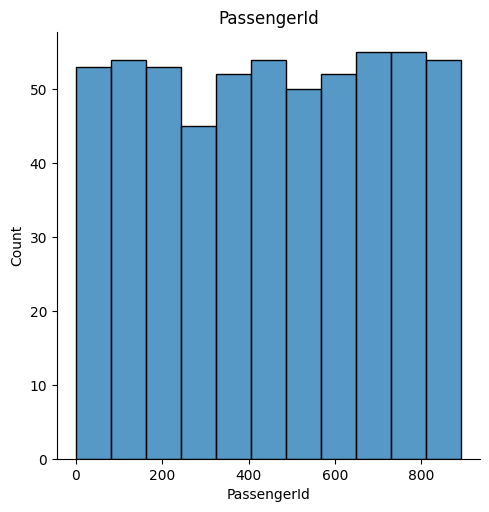

<Figure size 640x480 with 0 Axes>

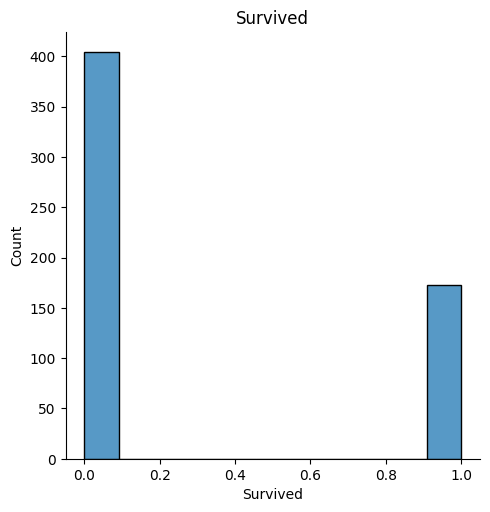

<Figure size 640x480 with 0 Axes>

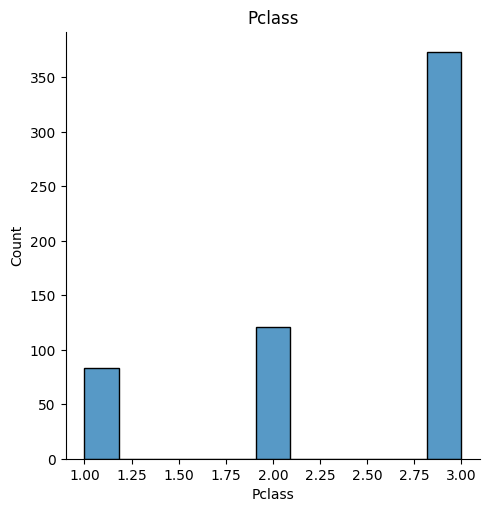

<Figure size 640x480 with 0 Axes>

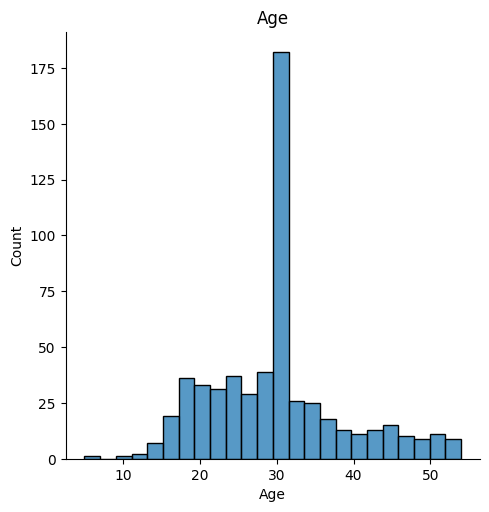

<Figure size 640x480 with 0 Axes>

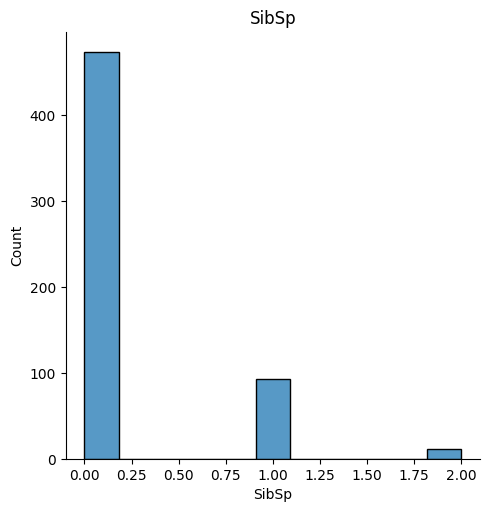

<Figure size 640x480 with 0 Axes>

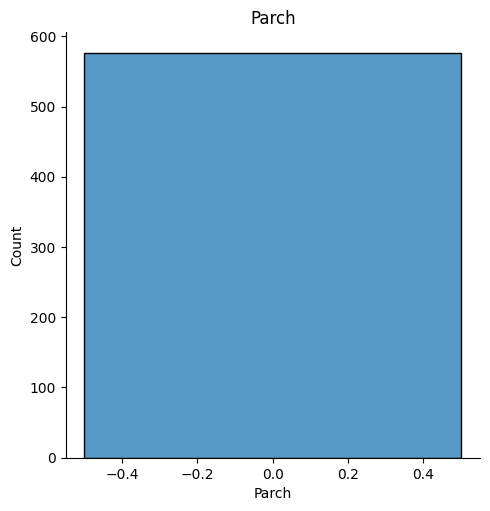

<Figure size 640x480 with 0 Axes>

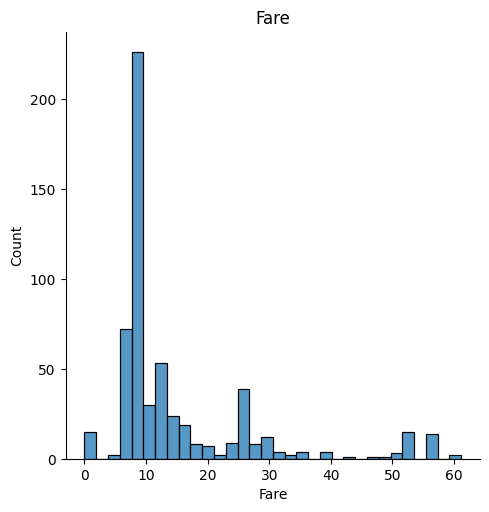

In [ ]:
numeric = data_processed.select_dtypes(['number'])
for i in range(len(numeric.columns)):
    plt.figure()
    sns.displot(numeric[numeric.columns[i]])
    plt.title(numeric.columns[i])
plt.show()

In [ ]:
print(data_processed['Age'].describe())

data_processed['AgeCategory'] = data_processed['Age'].map(lambda age: 'Child' if age < 18 else 'Adult' if age < 40 else 'Elder')
data_processed[data_processed['AgeCategory'] != 'Adult'].head(5)

count    577.000000
mean      29.742060
std        8.516997
min        5.000000
25%       24.000000
50%       29.699118
75%       32.500000
max       54.000000
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeCategory
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0.0,0.0,17463,51.8625,E46,S,Elder
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1.0,0.0,237736,30.0708,B96 B98,C,Child
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0.0,0.0,350406,7.8542,B96 B98,S,Child
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0.0,0.0,330923,8.0292,B96 B98,Q,Child
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0.0,0.0,PC 17601,27.7208,B96 B98,C,Elder


In [ ]:
data_processed[['Fare', 'Pclass']].groupby(['Pclass']).mean()

,Fare
Pclass,
1,36.091466
2,15.440047
3,10.050054
